In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import missingno as msno 
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option("display.max_columns", 101)

# Data Cleaning and Feature Engineering

In [3]:
df2 = pd.read_csv('~/documents/notes/fifa19.csv', index_col = False)

In [4]:
df2.head()

,Club,Playing_in_League,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,Real Madrid,Spain Primera Division (1),177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280,Right,4.0,4.0,4.0,High/ High,Lean,Yes,RCM,10.0,"Aug 1, 2012",NaN,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Real Madrid,Spain Primera Division (1),155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,https://cdn.sofifa.org/teams/2/light/243.png,€51M,€380K,2201,Right,4.0,3.0,3.0,High/ Medium,Normal,Yes,RCB,15.0,"Aug 1, 2005",NaN,2020,6'0,181lbs,73+3,73+3,73+3,70+3,71+3,71+3,71+3,70+3,71+3,71+3,71+3,72+3,75+3,75+3,75+3,72+3,81+3,84+3,84+3,84+3,81+3,84+3,87+3,87+3,87+3,84+3,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
2,Real Madrid,Spain Primera Division (1),182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,https://cdn.sofifa.org/teams/2/light/243.png,€76.5M,€355K,2190,Right,4.0,5.0,3.0,Medium/ Medium,Normal,Yes,LCM,8.0,"Jul 17, 2014",NaN,2022,6'0,168lbs,78+3,78+3,78+3,81+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,82+3,86+3,86+3,86+3,82+3,79+3,82+3,82+3,82+3,79+3,77+3,72+3,72+3,72+3,77+3,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
3,Real Madrid,Spain Primera Division (1),192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,https://cdn.sofifa.org/teams/2/light/243.png,€53.5M,€240K,1311,Left,4.0,2.0,1.0,Medium/ Medium,Courtois,Yes,GK,1.0,"Aug 9, 2018",NaN,2024,6'6,212lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
4,Real Madrid,Spain Primera Division (1),200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,https://cdn.sofifa.org/teams/2/light/243.png,€59.5M,€285K,2170,Right,3.0,3.0,2.0,Medium/ High,Normal,Yes,CDM,14.0,"Jul 11, 2013",NaN,2021,6'1,185lbs,72+3,72+3,72+3,69+3,73+3,73+3,73+3,69+3,74+3,74+3,74+3,71+3,80+3,80+3,80+3,71+3,78+3,85+3,85+3,85+3,78+3,79+3,85+3,85+3,85+3,79+3,52.0,59.0,76.0,85.0,53.0,69.0,59.0,74.0,82.0,78.0,59.0,65.0,62.0,84.0,66.0,86.0,88.0,87.0,89.0,79.0,87.0,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


In [5]:
df2.Value.describe()

count     16344
unique      217
top       €1.1M
freq        409
Name: Value, dtype: object

In [6]:
#drop unwanted columns
df2.drop(['Photo','Flag','Club Logo'],axis=1,inplace=True)

In [7]:
df2['Playing_in_League'].unique()

array(['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)', 'Portuguese Liga ZON SAGRES (1)',
       'Holland Eredivisie (1)', 'Turkish Süper Lig (1)',
       'Scottish Premiership (1)', 'Belgian Jupiler Pro League (1)',
       'English League Championship (2)', 'German 2. Bundesliga (2)',
       'Rest of World', 'Argentina Primera División \xa0(1)',
       'Austrian Football Bundesliga (1)', 'USA Major League Soccer (1)',
       'English League One (3)', 'Italian Serie B (2)',
       'Colombian Liga Postobón (1)', 'Mexican Liga MX (1)',
       'Spanish Segunda División (2)',
       'Campeonato Brasileiro Série A (1)', 'English League Two (4)',
       'Danish Superliga (1)', 'Swiss Super League (1)',
       'French Ligue 2 (2)', 'Polish T-Mobile Ekstraklasa (1)',
       'Norwegian Eliteserien (1)', 'Chinese Super League (1)',
       'Japanese J. League Division 1 (1)', 'German 3. Bundesliga (3

In [8]:
#select top 5 leauges in Europe:
df=df2[(df2["Playing_in_League"]=='Italian Serie A (1)')|
    (df2["Playing_in_League"]=='French Ligue 1 (1)')|(df2["Playing_in_League"]=='English Premier League (1)')|
    (df2["Playing_in_League"]=='Spain Primera Division (1)') |(df2["Playing_in_League"]=='German 1. Bundesliga (1)')]

In [9]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,208972.880829,24.720898,72.574784,78.037651,1719.212090,1.443099,3.050502,2.640263,20.524732,55.293670,49.816672,56.607748,65.028018,48.006572,61.427188,52.998270,46.992736,58.468004,64.937392,65.923210,66.069872,65.308544,68.710827,64.549637,60.935316,66.560706,64.544448,67.060879,52.451055,60.117606,51.847804,54.710827,58.931857,51.719128,65.556209,52.054652,52.609478,50.228641,17.398478,17.093047,16.687305,17.134556,17.510896
std,30740.911362,4.592386,7.378586,5.374274,298.761702,0.716438,0.693177,0.883895,16.008032,20.341153,21.563689,19.239730,15.881141,19.950205,20.597909,20.255897,19.248447,16.291291,18.216097,14.750156,14.469487,14.374198,9.579358,14.461207,18.431683,11.786158,16.084219,12.199712,21.078300,18.391231,23.274836,21.770335,15.429621,16.882988,11.558182,22.316126,24.284716,24.217854,19.940907,19.079944,18.225323,19.244166,20.244905
min,768.000000,16.000000,50.000000,58.000000,792.000000,1.000000,1.000000,1.000000,1.000000,7.000000,5.000000,8.000000,11.000000,4.000000,5.000000,6.000000,7.000000,10.000000,9.000000,13.000000,16.000000,21.000000,33.000000,20.000000,11.000000,26.000000,13.000000,24.000000,5.000000,11.000000,3.000000,2.000000,12.000000,9.000000,13.000000,3.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,192984.500000,21.000000,68.000000,75.000000,1553.000000,1.000000,3.000000,2.000000,9.000000,43.000000,32.000000,48.000000,60.000000,33.000000,55.000000,40.000000,33.000000,49.000000,61.000000,58.000000,58.000000,57.000000,63.000000,56.000000,51.500000,60.000000,56.000000,60.000000,37.000000,48.000000,28.000000,42.000000,48.500000,42.000000,59.000000,31.000000,29.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,212190.000000,24.000000,74.000000,78.000000,1784.000000,1.000000,3.000000,3.000000,18.000000,61.000000,54.000000,60.000000,69.000000,50.000000,68.000000,57.000000,46.000000,62.000000,70.000000,68.000000,68.000000,67.000000,70.000000,66.000000,66.000000,68.000000,68.000000,68.000000,58.000000,65.000000,59.000000,61.000000,61.000000,53.000000,67.000000,59.000000,62.000000,58.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,232103.000000,28.000000,77.000000,82.000000,1943.000000,2.000000,3.000000,3.000000,28.000000,71.000000,68.000000,70.000000,76.000000,64.000000,75.000000,69.000000,62.500000,70.000000,76.000000,76.000000,76.000000,76.000000,75.000000,75.000000,75.000000,74.500000,76.000000,76.000000,69.000000,74.000000,73.000000,71.000000,71.000000,64.000000,74.000000,71.000000,74.000000,72.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246616.000000,40.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,93.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,94.000000,94.000000,94.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


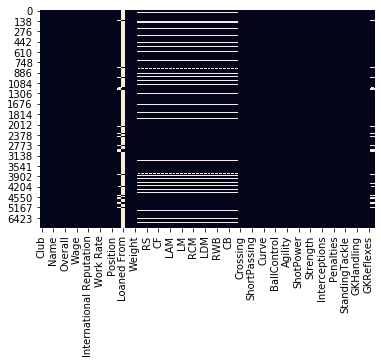

In [10]:
#Checked for missing values 
sns.heatmap(df.isnull(), cbar=False)

In [11]:
df.columns

Index(['Club', 'Playing_in_League', 'ID', 'Name', 'Age', 'Nationality',
       'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GK

In [12]:
#dropped more unnecessary colummns
df.drop(['Jersey Number','Loaned From' ],axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
#just a search
df[df['Club']=='Manchester City']

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
271,Manchester City,English Premier League (1),192985,K. De Bruyne,27,Belgium,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
272,Manchester City,English Premier League (1),168542,David Silva,32,Spain,90,90,€60M,€285K,2115,Left,4.0,2.0,4.0,High/ Medium,Normal,Yes,LCM,"Jul 14, 2010",2020,5'8,148lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,85+3,69+3,70+3,70+3,70+3,69+3,64+3,57+3,57+3,57+3,64+3,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,€111M
273,Manchester City,English Premier League (1),153079,S. Agüero,30,Argentina,89,89,€64.5M,€300K,2107,Right,4.0,4.0,4.0,High/ Medium,Stocky,Yes,ST,"Jul 28, 2011",2021,5'8,154lbs,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
274,Manchester City,English Premier League (1),222492,L. Sané,22,Germany,86,92,€61M,€195K,2090,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,LW,"Aug 2, 2016",2021,6'0,165lbs,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,82+2,82+2,82+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2,83.0,81.0,72.0,79.0,85.0,88.0,82.0,68.0,64.0,85.0,93.0,96.0,88.0,81.0,81.0,86.0,64.0,79.0,70.0,78.0,61.0,34.0,84.0,82.0,71.0,78.0,36.0,32.0,35.0,8.0,12.0,9.0,9.0,14.0,€125.1M
275,Manchester City,English Premier League (1),218667,Bernardo Silva,23,Portugal,86,91,€59.5M,€180K,2039,Left,2.0,3.0,4.0,High/ Medium,Lean,Yes,RW,"Jul 1, 2017",2022,5'8,141lbs,75+2,75+2,75+2,84+2,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,80+2,80+2,80+2,84+2,68+2,65+2,65+2,65+2,68+2,63+2,53+2,53+2,53+2,63+2,85.0,75.0,51.0,85.0,69.0,92.0,83.0,67.0,79.0,91.0,84.0,74.0,90.0,82.0,88.0,70.0,50.0,78.0,48.0,72.0,58.0,49.0,83.0,86.0,68.0,85.0,49.0,44.0,35.0,9.0,10.0,14.0,12.0,9.0,€114.5M
276,Manchester City,English Premier League (1),210257,Ederson,24,Brazil,86,90,€41.5M,€125K,1463,Left,2.0,3.0,1.0,Medium/ Medium,Normal,Yes,GK,"Jul 1, 2017",2025,6'2,190lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,14.0,56.0,18.0,23.0,15.0,20.0,58.0,37.0,64.0,63.0,60.0,86.0,48.0,42.0,58.0,41.0,68.0,18.0,35.0,25.0,20.0,67.0,17.0,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M
277,Manchester City,English Premier League (1),202652,R. Sterling,23,England,86,89,€56.5M,€195K,2036,Right,3.0,3.0,4.0,High/ Medium,Lean,Yes,RW,"Jul 14, 2015",2023,5'7,152lbs,76+3,76+3,76+3,84+3,83+3,83+3,83+3,84+3,83+3,83+3,83+3,84+3,77+3,77+3,77+3,84+3,69+3,63+3,63+3,63+3,69+3,66+3,52+3,52+3,52+3,66+3,77.0,77.0,38.0,84.0,67.0,88.0,70.0,63.0,69.0,87.0,95.0,92.0,93.0,87.0,93.0,73.0,57.0,78.0,52.0,73.0,38.0,30.0,87.0,77.0,69.0,77.0,47.0,58.0,54.0,15.0,12

In [15]:
#check for null
df.Value.isnull().sum()

0

In [16]:
#function to clean the column with currency notations and value abbrevations

def clean_values(value):
    remove= value.replace('€', '')
    if 'M'in remove:
        remove= float(remove.replace('M', ''))*1000000
    elif 'K'in value:
        remove= float(remove.replace('K', ''))*1000
    return float(remove)
    

In [17]:
# clean up the target variable (Value), convert the K to 1000 the M to millions and remove the euros
df['Value'] = df['Value'].apply(lambda x: clean_values(x))
#clean wages
df['Wage'] = df['Wage'].apply(lambda x: clean_values(x))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
#clean realease clause

df['Release Clause'] = df['Release Clause'].replace('€', '')
# df['Release Clause'] = df['Release Clause'].replace('', '')
df['Release Clause'] = df['Release Clause'].apply(lambda x: str(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: clean_values(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [20]:
df.Height.isnull().sum()

4

In [21]:
# df['Height']= df['Height'].apply(lambda x:x.split("'"))


In [22]:
#checked for null values in  heights
df[df['Height'].isnull()]

,Club,Playing_in_League,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
672,Everton,English Premier League (1),233782,M. Feeney,19,England,62,78,600000.0,5000.0,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2117,VfB Stuttgart,German 1. Bundesliga (1),246328,A. Aidonis,17,Germany,62,82,550000.0,2000.0,1418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3029,Bologna,Italian Serie A (1),245564,Vinicius,19,Brazil,62,77,525000.0,1000.0,1141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4190,Montpellier HSC,French Ligue 1 (1),244543,Y. Ammour,19,France,62,77,650000.0,2000.0,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#drop missing values in height column
df.dropna(subset=['Height'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
#function to clean the height columns # its a float object, so index and change to in
def clean_height(ht):
    ht= str(ht)
    ht= ht.strip(" ")
    ht= ht.split("'")
    return((int(ht[0])*12)+int(ht[1]))
    

In [25]:
#clean the heights
df['Height']= df['Height'].map(lambda x: clean_height (x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [302]:
#change height to a numeric value
df['Height']= pd.to_numeric(df['Height'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# # Examining duplicate rows
# df.loc[df.duplicated(), :].sort_values('Name')

In [303]:
# df.Height= df.Height.astype(str)

In [29]:
#function to clean the weights
def clean_weight(wt):
    wt= wt.replace("lbs", "")
    wt = int(wt)
    return wt

In [30]:
#clean weight column
df['Weight']= df['Weight'].map(lambda x: clean_weight (x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# clean year joined (date joined) and contract valid until column change to datetime 
df['Joined']= pd.to_datetime(df['Joined'])
df['Contract Valid Until']= pd.to_datetime(df['Contract Valid Until'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
type(df['Contract Valid Until'])

pandas.core.series.Series

In [33]:
pd.DatetimeIndex(df['Joined']).year

Float64Index([2012.0, 2005.0, 2014.0, 2018.0, 2013.0, 2013.0, 2007.0, 2013.0,
              2014.0, 2011.0,
              ...
              2012.0, 2015.0, 2018.0, 2018.0, 2018.0,    nan,    nan, 2017.0,
              2017.0, 2018.0],
             dtype='float64', name='Joined', length=2891)

In [34]:
#creating a different column called contract lenght which would be the years left on contract. Might be useful
df['years_left_contract']= pd.DatetimeIndex(df['Contract Valid Until']).year.map(lambda x: int(x)-2018) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


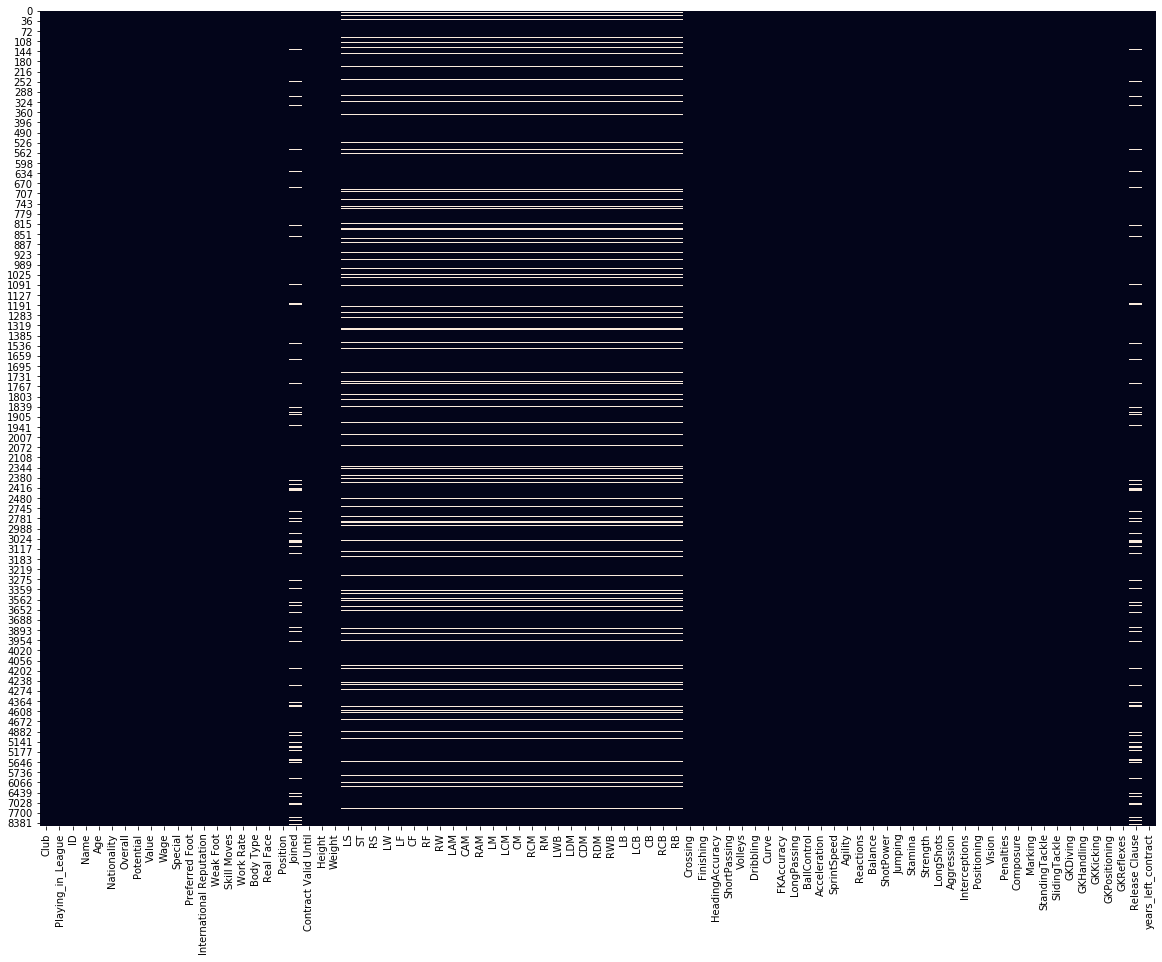

In [35]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(), cbar=False)

In [36]:
#saved data frame in df3 just incase
df3=df

In [37]:
#drop unnnecessary columns (joined and realease clause)
df.drop(columns= ['Joined','Release Clause'], axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
#creating a dictionary of continents 
# mapping countries to their continents - dictionary
continents = {
    'Africa' : ['Algeria','Angola','Benin','Botswana','Burkina','Burundi','Cameroon','Cape Verde','Central African Republic','Chad','Comoros','Congo','DR Congo','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea Bissau','Ivory Coast','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Zambia','Zimbabwe','Burkina Faso'],
    'Antarctica' : ['Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Asia' : ['Afghanistan','Bahrain','Bangladesh','Bhutan','Brunei','Burma (Myanmar)','Cambodia','China','China PR','East Timor','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan','North Korea','South Korea','Korea Republic','Korea DPR','Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Nepal','Oman','Pakistan','Palestine','Philippines','Qatar','Russian Federation','Saudi Arabia','Singapore','Sri Lanka','Syria','Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen','Russia'],
    'Australia Oceania' : ['Australia','New Caledonia', 'New Zealand'],
    'Europe' : ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','FYR Macedonia','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','Northern Ireland','Norway','Poland','Portugal','Romania','San Marino','Scotland','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','England','Vatican City','Republic of Ireland','Wales'],
    'North America' : ['Antigua and Barbuda','Bahamas','Barbados','Belize','Canada','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago','United States'],
    'South America' : ['Argentina','Bolivia','Brazil','Chile','Colombia','Curacao','Ecuador','Guyana','Paraguay','Peru','Suriname','Trinidad & Tobago','Uruguay','Venezuela']
}

In [39]:
# function to countries to their continents - dictionary, takes in the country, returns a continent it belongs to from dictionary
def find_continent(x, continents_list):
    for key in continents_list:
        if x in continents_list[key]:
            return key
    return np.NaN



In [40]:
#create columns with players mapped to there continents
df['Continent'] = df['Nationality'].apply(lambda x: find_continent(x, continents))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
# Dictionary for defining grouped player positions
#mapping players to position category
pos_dict = {
    'Attack' : ['ST','RW','LW', 'CF'],
    'Midfield': ['RM', 'CM', 'LM', 'CAM', 'CDM', 'RCM', 'LCM'],
    'Defence': ['CB', 'LB', 'RB', 'RWB', 'LWB', 'RCB', 'LCB'],
    'Goalkeeper': ['GK']}
pos_dict
#function to map abbreivations to actual postitions
def find_position(x, pos_list):
    for key in pos_list:
        if x in pos_list[key]:
            return key
    return np.NaN

In [42]:
#creating a new column called position to map the abbrevations to the actual positions
df['position'] = df['Position'].apply(lambda x: find_position(x, pos_dict))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df['Body Type'].unique()

array(['Lean', 'Normal', 'Courtois', 'Stocky', 'PLAYER_BODY_TYPE_25',
       'Shaqiri', 'Messi', 'C. Ronaldo', 'Neymar'], dtype=object)

In [44]:
#clean body type

df.loc[df['Body Type'] == 'PLAYER_BODY_TYPE_25', 'Body Type'] = 'Normal'
df.loc[df['Body Type'] == 'Messi', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Shaqiri', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'Neymar', 'Body Type'] = 'Lean'
df.loc[df['Body Type'] == 'Akinfenwa', 'Body Type'] = 'Stocky'
df.loc[df['Body Type'] == 'C. Ronaldo', 'Body Type'] = 'Normal'
df.loc[df['Body Type'] == 'Courtois', 'Body Type'] = 'Normal'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Visualizations and EDA

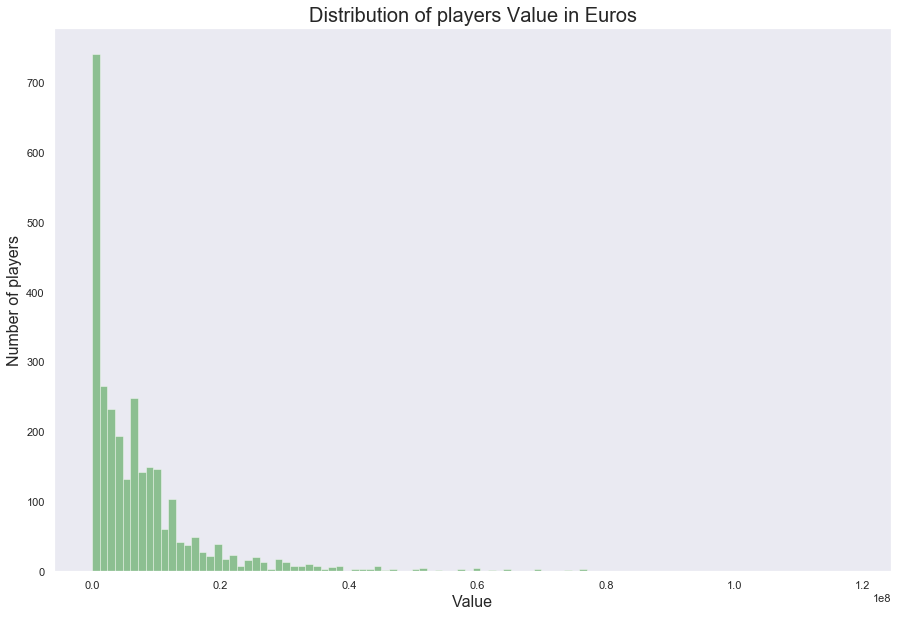

In [46]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Value
plt.figure(figsize=(15,10))
ax = sns.distplot(x, bins = 100, kde = False, color='green', norm_hist=False)
ax.set_xlabel(xlabel="Value", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Distribution of players Value in Euros', fontsize=20)
plt.show()

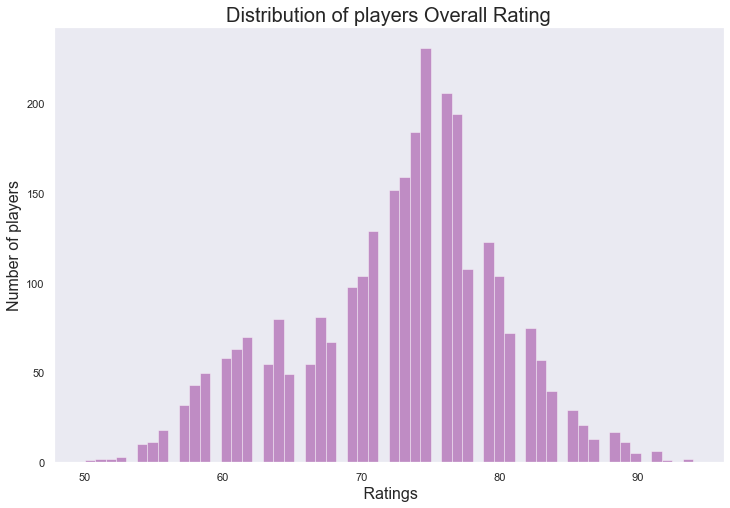

In [47]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Overall
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='purple')
ax.set_xlabel(xlabel=" Ratings", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Distribution of players Overall Rating', fontsize=20)
plt.show()

In [48]:
bynations= df.groupby(by= "Nationality")
bynations.count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ff613280550>>

In [49]:
byleauges= df.groupby(by='Playing_in_League')
byleauges['Name'].count()

Playing_in_League
English Premier League (1)    648
French Ligue 1 (1)            568
German 1. Bundesliga (1)      547
Italian Serie A (1)           545
Spain Primera Division (1)    583
Name: Name, dtype: int64

In [50]:
#Number of countires playing
len(df["Nationality"].unique())

100

In [51]:
#data frame of forigen players
df_for=df[(df["Nationality"]!='Spain')&(df["Nationality"]!='England')&
   (df["Nationality"]!='Germany')&(df["Nationality"]!='France')&(df["Nationality"]!='Italy')]


In [52]:
bynationsfor= df_for.groupby(by= 'Playing_in_League')
bynationsfor['Name'].count()

Playing_in_League
English Premier League (1)    302
French Ligue 1 (1)            239
German 1. Bundesliga (1)      238
Italian Serie A (1)           271
Spain Primera Division (1)    175
Name: Name, dtype: int64

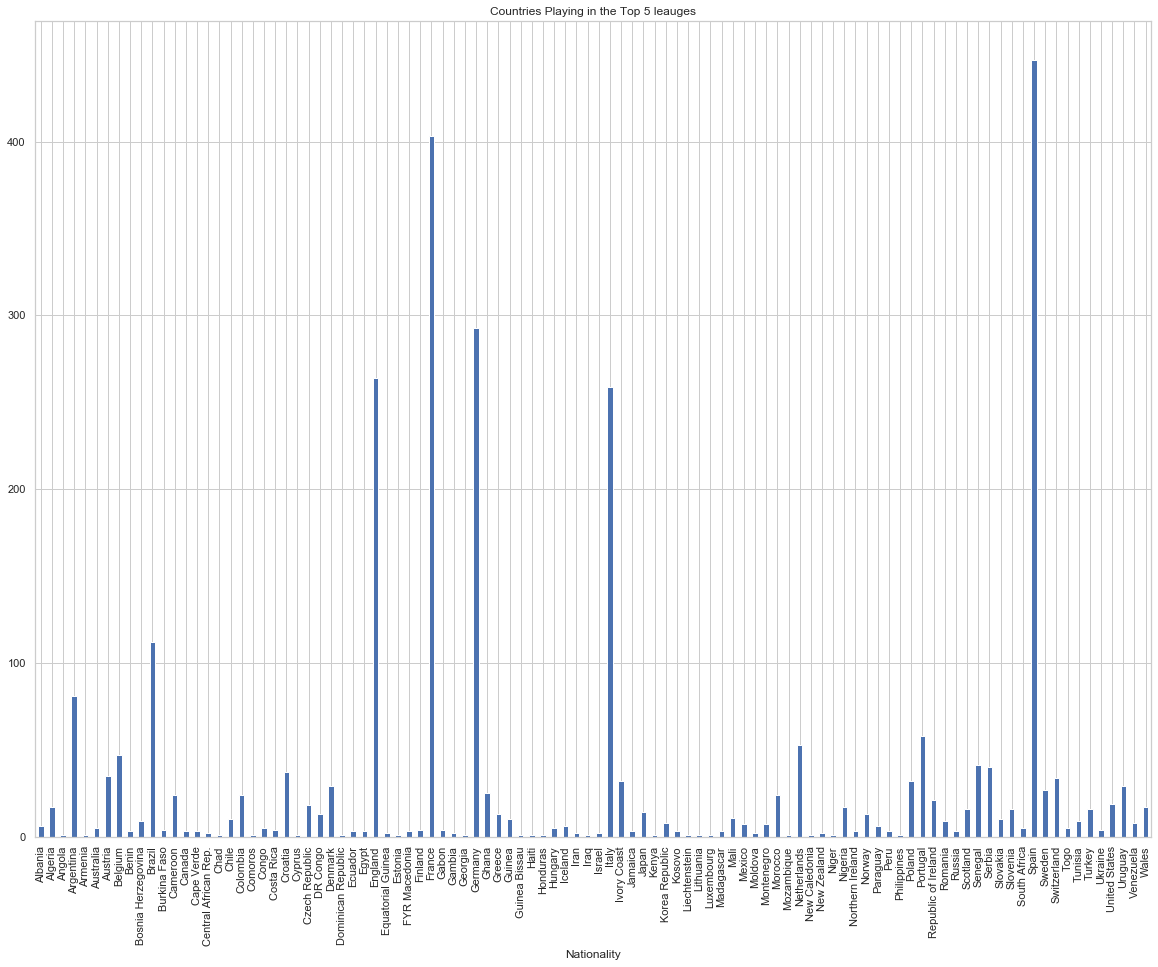

In [53]:
sns.set(style="whitegrid")
#sns.set_color_codes("Spectral")

plt.figure( figsize=(20,15))
#the_grid = GridSpec(2, 2)

plt.subplot(title='Countries Playing in the Top 5 leauges')
bynations['Name'].count().plot(kind = 'bar')
# sns.barplot(x='FoodCode',y='Source', data=df, palette='Spectral')
# plt.subplot(the_grid[0, 0], title='Selected Flavors of Pies')

# sns.barplot(x='Source',y='FoodCode', data=flavor_data, palette='Spectral')

# plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

In [54]:
#grouped by league and nations
byleaugesnNa= df.groupby(by=['Playing_in_League', 'Nationality'])
plt.figure( figsize=(20,15))
lnun= byleaugesnNa.count()['Name'].unstack()
lnun

Nationality,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Belgium,Benin,Bosnia Herzegovina,Brazil,Burkina Faso,Cameroon,Canada,Cape Verde,Central African Rep.,Chad,Chile,Colombia,Comoros,Congo,Costa Rica,Croatia,Cyprus,Czech Republic,DR Congo,Denmark,Dominican Republic,Ecuador,Egypt,England,Equatorial Guinea,Estonia,FYR Macedonia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guinea,Guinea Bissau,Haiti,Honduras,Hungary,Iceland,Iran,Iraq,Israel,Italy,Ivory Coast,Jamaica,Japan,Kenya,Korea Republic,Kosovo,Liechtenstein,Lithuania,Luxembourg,Madagascar,Mali,Mexico,Moldova,Montenegro,Morocco,Mozambique,Netherlands,New Caledonia,New Zealand,Niger,Nigeria,Northern Ireland,Norway,Paraguay,Peru,Philippines,Poland,Portugal,Republic of Ireland,Romania,Russia,Scotland,Senegal,Serbia,Slovakia,Slovenia,South Africa,Spain,Sweden,Switzerland,Togo,Tunisia,Turkey,Ukraine,United States,Uruguay,Venezuela,Wales
Playing_in_League,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
English Premier League (1),NaN,2.0,NaN,16.0,1.0,3.0,6.0,17.0,1.0,2.0,20.0,NaN,3.0,1.0,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,2.0,1.0,2.0,4.0,13.0,NaN,1.0,3.0,254.0,1.0,NaN,NaN,NaN,31.0,3.0,NaN,NaN,15.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,1.0,9.0,5.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,1.0,2.0,NaN,21.0,NaN,2.0,NaN,7.0,3.0,7.0,1.0,NaN,1.0,5.0,19.0,21.0,2.0,NaN,16.0,6.0,4.0,1.0,1.0,NaN,37.0,4.0,7.0,1.0,1.0,2.0,2.0,5.0,2.0,2.0,16.0
French Ligue 1 (1),NaN,7.0,NaN,6.0,NaN,NaN,NaN,13.0,2.0,NaN,27.0,3.0,11.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,4.0,NaN,4.0,NaN,2.0,6.0,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,310.0,1.0,NaN,NaN,3.0,1.0,2.0,4.0,1.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,6.0,16.0,NaN,2.0,NaN,2.0,NaN,NaN,1.0,NaN,3.0,8.0,NaN,NaN,1.0,11.0,1.0,3.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,3.0,10.0,NaN,1.0,1.0,NaN,20.0,7.0,2.0,3.0,4.0,7.0,5.0,3.0,2.0,8.0,2.0,NaN,2.0,3.0,NaN,NaN
German 1. Bundesliga (1),1.0,2.0,NaN,6.0,NaN,2.0,28.0,6.0,NaN,2.0,15.0,NaN,4.0,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,9.0,NaN,8.0,2.0,6.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,23.0,NaN,NaN,NaN,268.0,4.0,4.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,4.0,2.0,1.0,7.0,NaN,2.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,3.0,NaN,16.0,NaN,NaN,NaN,2.0,NaN,5.0,1.0,1.0,NaN,8.0,5.0,NaN,1.0,1.0,NaN,2.0,6.0,4.0,1.0,1.0,10.0,10.0,17.0,1.0,NaN,7.0,1.0,12.0,1.0,1.0,NaN
Italian Serie A (1),4.0,4.0,1.0,27.0,NaN,NaN,1.0,7.0,NaN,4.0,30.0,1.0,2.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,18.0,NaN,5.0,NaN,6.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,17.0,NaN,2.0,1.0,5.0,9.0,3.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,235.0,7.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2.0,2.0,3.0,NaN,11.0,NaN,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,16.0,10.0,NaN,3.0,NaN,NaN,8.0,17.0,3.0,10.0,NaN,15.0,7.0,7.0,NaN,NaN,3.0,NaN,NaN,9.0,2.0,NaN
Spain Primera Division (1),1.0,2.0,NaN,26.0,NaN,NaN,NaN,4.0,NaN,1.0,20.0,NaN,4.0,NaN,NaN,1.0,NaN,4.0,11.0,NaN,1.0,2.0,4.0,NaN,1.0,1.0,2.0,1.0,NaN,NaN,1.0,1.0,NaN,2.0,NaN,22.0,NaN,NaN,NaN,2.0,7.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,5.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,1.0,NaN,NaN,14.0,NaN,2.0,1.0,NaN,5.0,6.0,NaN,1.0,NaN,378.0,1.0,NaN,1.0,NaN,2.0,1.0,NaN,14.0,3.0,1.0


<Figure size 1440x1080 with 0 Axes>

# Foreign Players 

In [55]:

#create columns for foreign players i.e player outside europe
df['Foreign'] = np.where(df['Continent']!= 'Europe',1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
#grouped the data by continents and leuages
byleaugesnCo= df.groupby(by=['Playing_in_League', 'Continent'])
plt.figure( figsize=(20,15))
legCo= byleaugesnCo.count()['Name'].unstack(level='Continent').apply(lambda x:100 * x / float(x.sum()), axis=1)
legCo
#legCo(level='Playing_in_League').plot(kind='bar')
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)

Continent,Africa,Asia,Australia Oceania,Europe,North America,South America
Playing_in_League,,,,,,
English Premier League (1),7.407407,1.543210,0.771605,81.172840,1.543210,7.561728
French Ligue 1 (1),21.164021,1.410935,0.176367,69.488536,0.705467,7.054674
German 1. Bundesliga (1),4.570384,3.290676,0.365631,83.729433,2.925046,5.118830
Italian Serie A (1),7.889908,0.733945,NaN,76.697248,0.366972,14.311927
Spain Primera Division (1),5.670103,1.202749,NaN,78.006873,1.202749,13.917526


<Figure size 1440x1080 with 0 Axes>

In [68]:
#get percentage of foreign players in different leauges
dff=df.groupby(by=['Playing_in_League', 'Foreign'])
dffc=dff.count()['Name'].unstack(level='Foreign').apply(lambda x:100 * x / float(x.sum()), axis=1)
dffc

Foreign,0,1
Playing_in_League,,
English Premier League (1),81.172840,18.827160
French Ligue 1 (1),69.366197,30.633803
German 1. Bundesliga (1),83.729433,16.270567
Italian Serie A (1),76.697248,23.302752
Spain Primera Division (1),77.873070,22.126930


In [69]:
canvas=(11.7, 8.27) # A4 size 

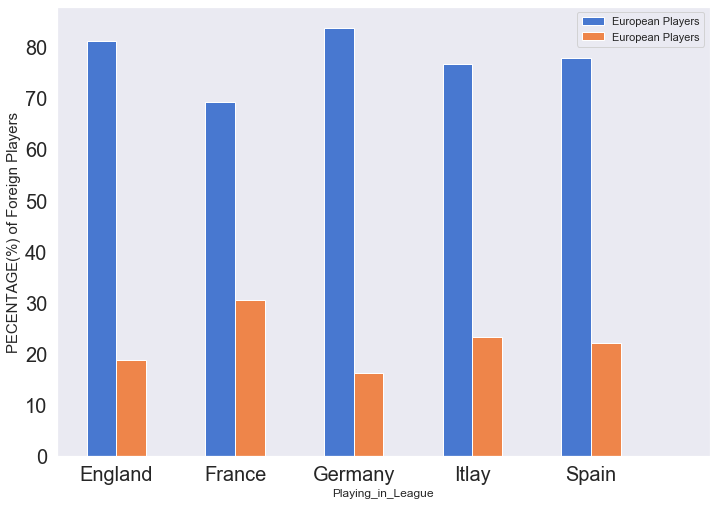

In [324]:
dffc.plot(kind= "bar", figsize=canvas, fontsize=20)
plt.ylabel('PECENTAGE(%) of Foreign Players', fontsize= 15)
plt.legend
L=plt.legend()

L.get_texts()[0].set_text('European Players')
L.get_texts()[1].set_text('European Players')
plt.xticks( [0, 1, 2,3, 4,5],['England','France', 'Germany', 'Itlay', 'Spain'], rotation=0)

plt.savefig('Foreign.png')


# T- Test

# Which is the better leauge to play as a foreign Player?

Italain leauge Vs Spanish leauge

𝐻0 : Null hypotesis: The mean wage for foreign Players in Italy is greater than in Spain

𝐻1 : Alternative Hypotesis: The mean wage for foreign Players in Spain is greater than in Italy

In [61]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

a = df[df['Playing_in_League']== 'Spain Primera Division (1)'].Wage
b = df[df['Playing_in_League']== 'Italian Serie A (1)'].Wage
# Use scipy.stats.ttest_ind.
t, p = ttest_ind(a, b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))



ttest_ind:            t = 0.302459  p = 0.762366


# Hypotesis testing 

# Carrying out a ANNOVA on the different leagues Checking  age 




𝐻0 : Null hypotesis: is that the mean age across the 5 leauges are the same 

𝐻1 : Alternative Hypotesis: Alternate Hypotesis is the mean ages is different accros the leauges




In [63]:
stats.f_oneway( df['Age'][df['Playing_in_League'] == 'Spain Primera Division (1)'],
                df['Age'][df['Playing_in_League']== 'English Premier League (1)'], 
                df['Age'][df['Playing_in_League']== 'Italian Serie A (1)'],
                df['Age'][df['Playing_in_League']== 'French Ligue 1 (1)'],
                df['Age'][df['Playing_in_League']== 'German 1. Bundesliga (1)'])

F_onewayResult(statistic=9.604995377088494, pvalue=1.028867832465448e-07)

From my test there is a significant difference between the mean ages in the different leauge

Visualisation to illustrate the age disparity

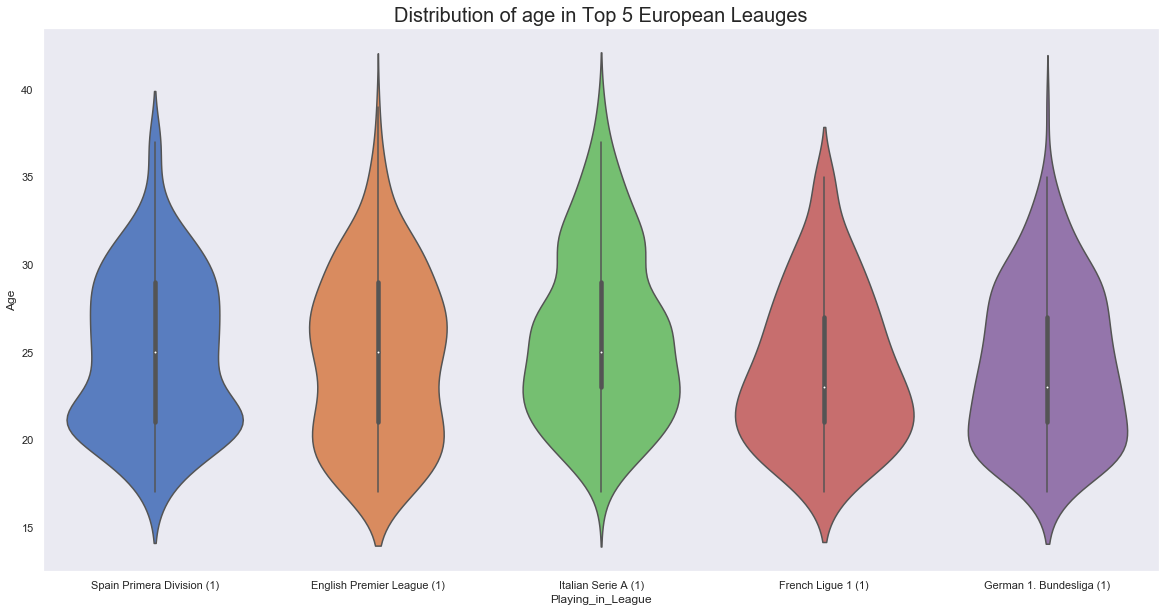

In [301]:
# Compare six clubs in relation to age
leauges = ['Spain Primera Division (1)', 'English Premier League (1)',
       'Italian Serie A (1)', 'French Ligue 1 (1)',
       'German 1. Bundesliga (1)']
df_club = df.loc[df['Playing_in_League'].isin(leauges) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.violinplot(x='Playing_in_League', y="Age", data=df_club );
ax.set_title(label='Distribution of age in Top 5 European Leauges', fontsize=20);
plt.savefig('Violin.png')

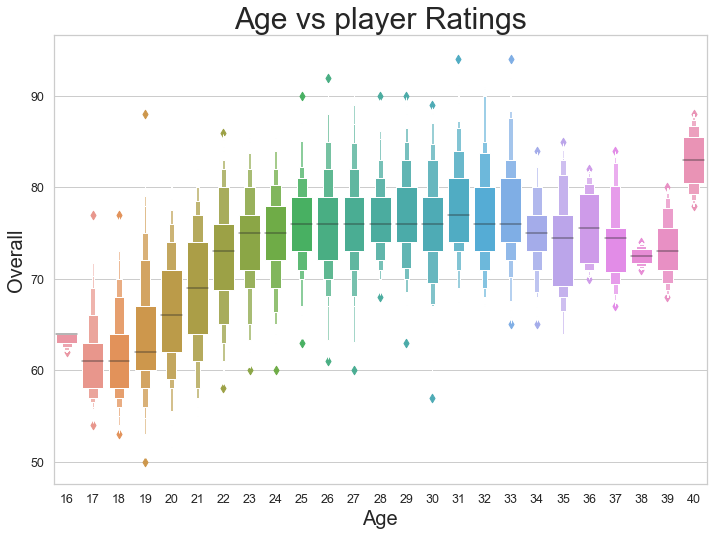

In [67]:
#to how the Players A cuurently Rated over different ages
def sns_settings(title='', xtitle='', ytitle='', rotate = 0):
    sns.set(style='dark', palette='muted', color_codes=True)
    ax.axes.set_title(title, fontsize=30)
    ax.set_xlabel(xtitle, fontsize=20)
    ax.set_ylabel(ytitle, fontsize = 20)
    plt.yticks(fontsize='12.5') # ticks are scaling numbers
    plt.xticks(fontsize='12.5')
    a = plt.setp(ax.get_xticklabels(), rotation=rotate)

canvas = (11.7, 8.27) # A4 size    
fig, ax = plt.subplots(figsize=canvas) # hack to increase the size of figures or plots or canvas

sns_settings(title = 'Age vs player Ratings')
sns.boxenplot(data=df, x="Age", y="Overall")

A notable Observation in the above Vissualization, Was that the average rating for oldest players is much higher, than for any other, group, says something about how only the very best player get to keep playing for that long.

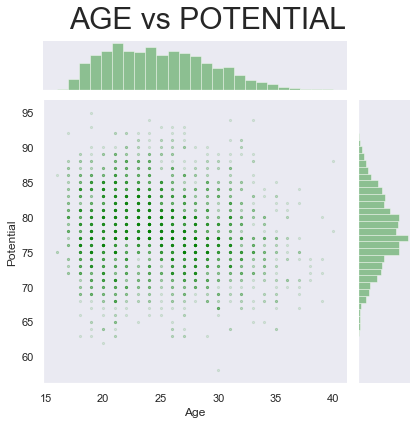

In [93]:
#visualization of age vs potential of players
g= sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'green'},
              marginal_kws={'color':'green'}, )#.set_title(title, fontsize=30)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('AGE vs POTENTIAL', fontsize=30); # can also get the figure from plt.gcf()


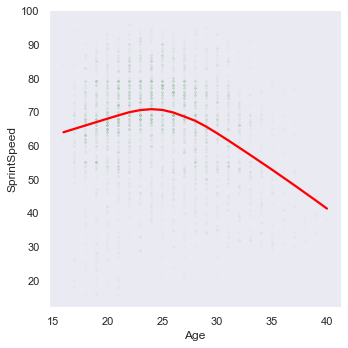

In [94]:
#visualization of age vs sprint speed
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

# Are all positions equal? ANOVA test




𝐻0 : Null hypotesis, HO is that the average mean of player wages for different position are the same

𝐻1 : Alternative Hypotesis, HA, is that average Wage of players for different positions are different



In [1298]:
#anova test of wages accross the leauges
stats.f_oneway( df['Wage'][df['position'] == 'Attack'],
                df['Wage'][df['position'] == 'Midfield'], 
                df['Wage'][df['position'] == 'Goalkeeper'],
                df['Wage'][df['position'] == 'Defence'])

F_onewayResult(statistic=7.879245775902799, pvalue=3.1143636955880194e-05)

From my test, the P value is less than 0.05, from this, I was abble to reject the null hypotesis, and conclue that the avarage Wage for player in different possitiong are different. Not all positions are equal

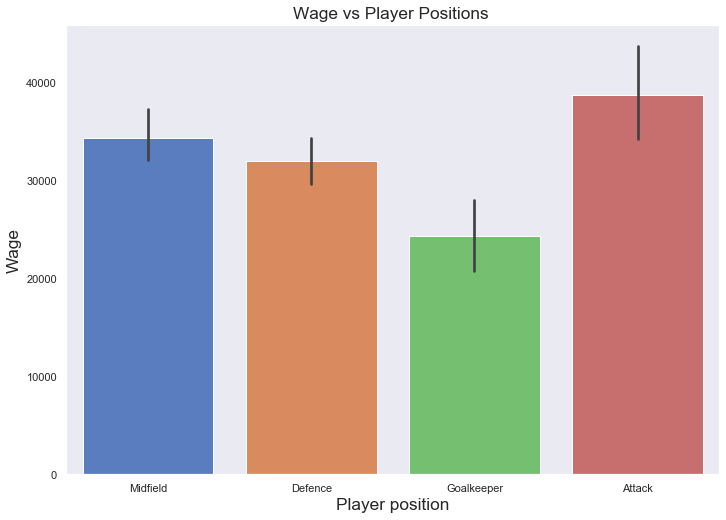

In [330]:
figure,ax = plt.subplots(figsize=canvas)  #boxplot of price & neighborhood groups
sns.barplot(x = "position", y = "Wage", data = df)
ax.set_title('Wage vs Player Positions ', fontdict={'fontsize':'x-large'})
ax.set_xlabel('Player position', fontdict={'fontsize':'x-large'})
ax.set_ylabel('Wage', fontdict={'fontsize':'x-large'})
plt.savefig('wagev position.png')

From our test and observations in the Plot above we can see that players in the Attacting position get paid the most on Average

In [326]:
df[df['position']=='Attack'].Wage.mean()

38678.260869565216

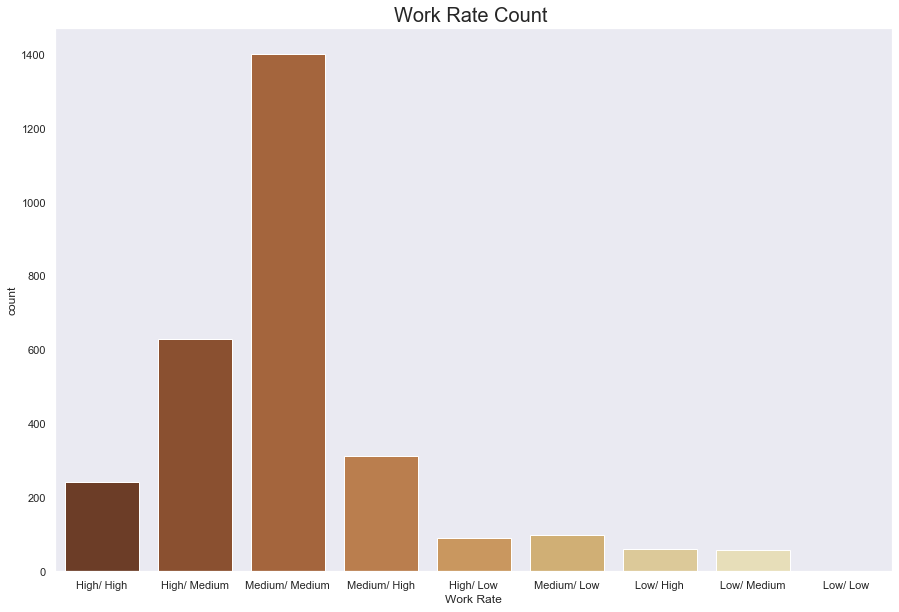

In [74]:

#work rates and its distribution in the data
fig2, ax = plt.subplots(figsize=(15,10))
ax = sns.countplot(x = 'Work Rate', data = df, palette = 'YlOrBr_r', saturation=0.5,  )
ax.set_title(label='Work Rate Count ', fontsize=20);


In [ ]:
stats.f_oneway( df['Wage'][df['Work Rate'] == 'Attack'],
                df['Wage'][df['position'] == 'Midfield'], 
                df['Wage'][df['position'] == 'Goalkeeper'],
                df['Wage'][df['position'] == 'Defence'])

# Does hard work pay?

This is the avarage wage earn for players in the different work rates. This shows that players that have High/high work rate, on average earn the highest. Yes! hard work pays!

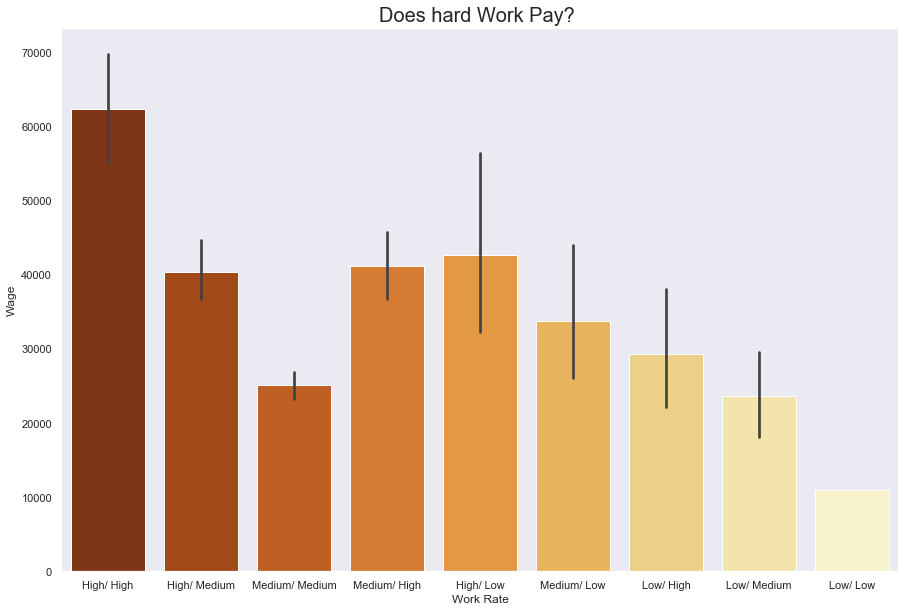

In [308]:
fig3, ax = plt.subplots(figsize=(15,10))
sns.barplot(data = df, x = 'Work Rate', y = 'Wage', palette='YlOrBr_r' )
ax.set_title(label='Does hard Work Pay? ', fontsize=20);
plt.savefig('Hard_work.png')

In [311]:
df[df['Work Rate']=='High/ High'].Wage.mean()

62396.694214876035

In [297]:
features= ['Value', 'Age',
       'Overall', 'Potential', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 
       'Height',
       'Weight',
       'Jumping',  'Strength', 
       'StandingTackle', 'years_left_contract']
        

In [298]:
n = 3
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

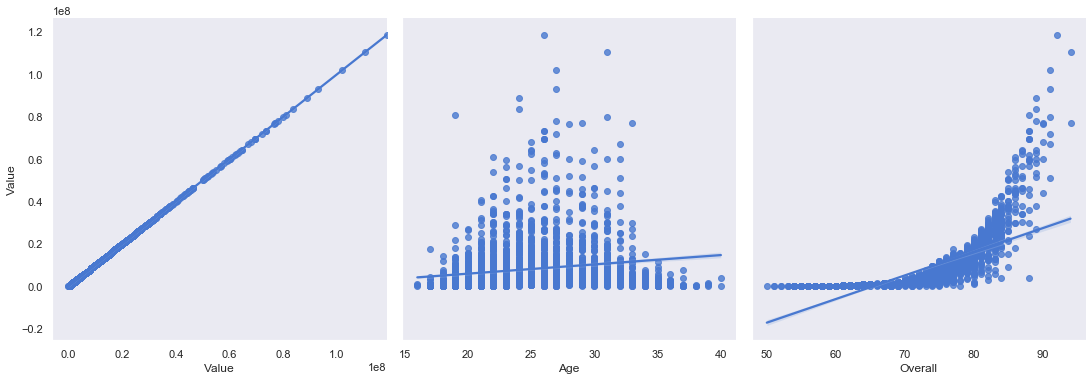

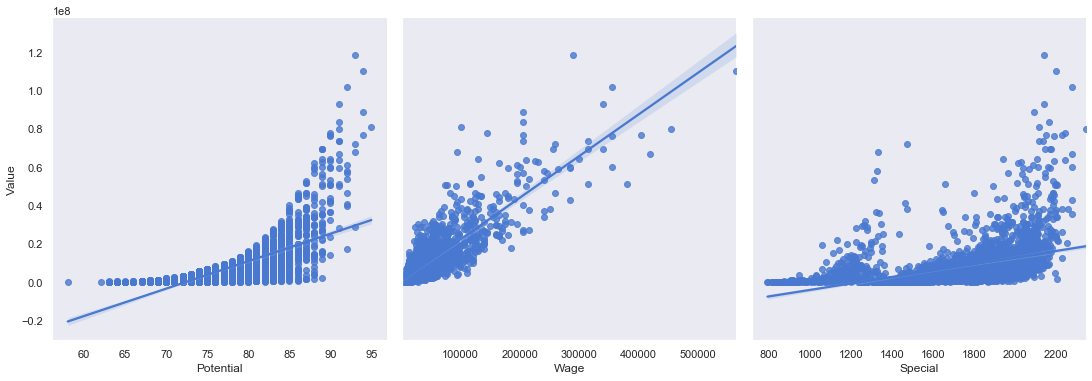

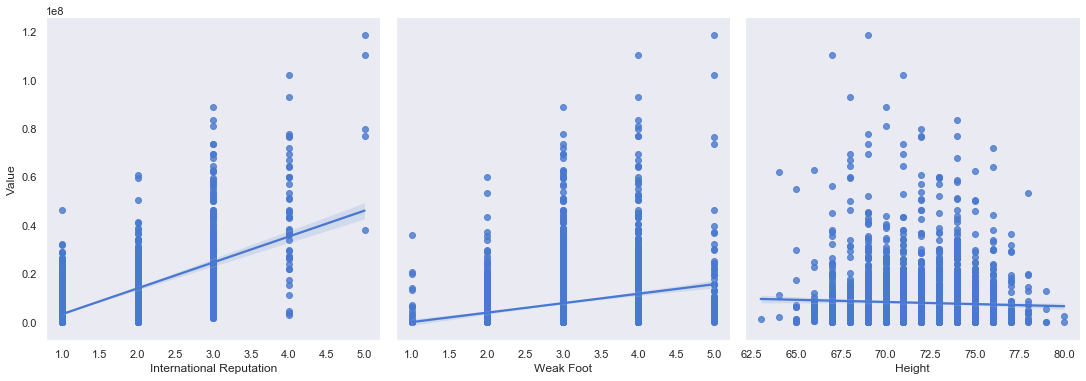

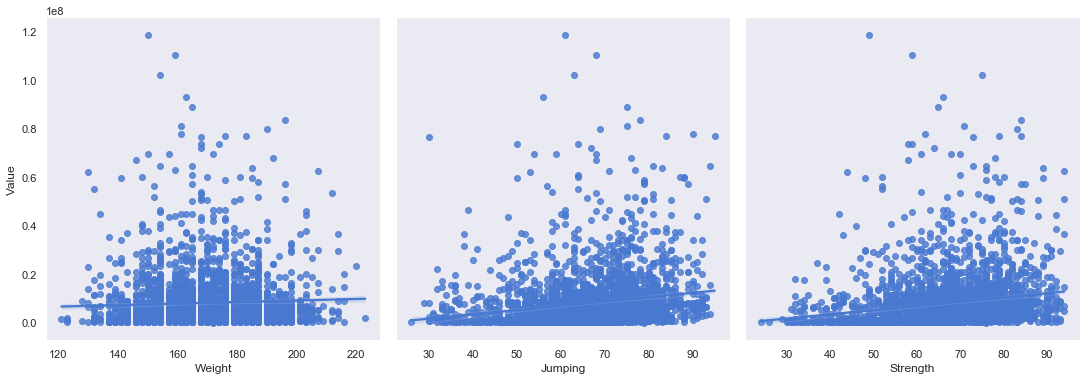

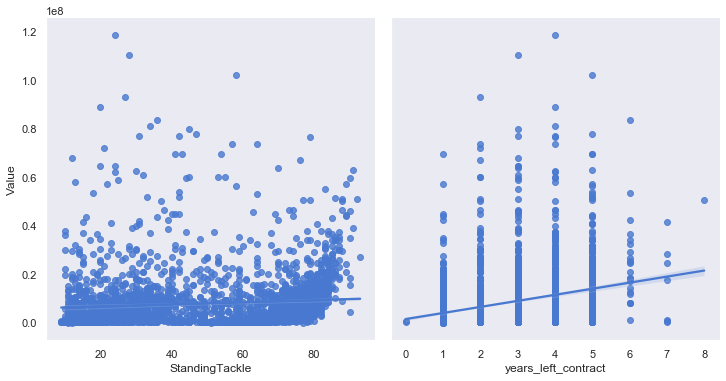

In [304]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['Value'],x_vars=i, kind="reg", height=5)

# Checking for Colinearity

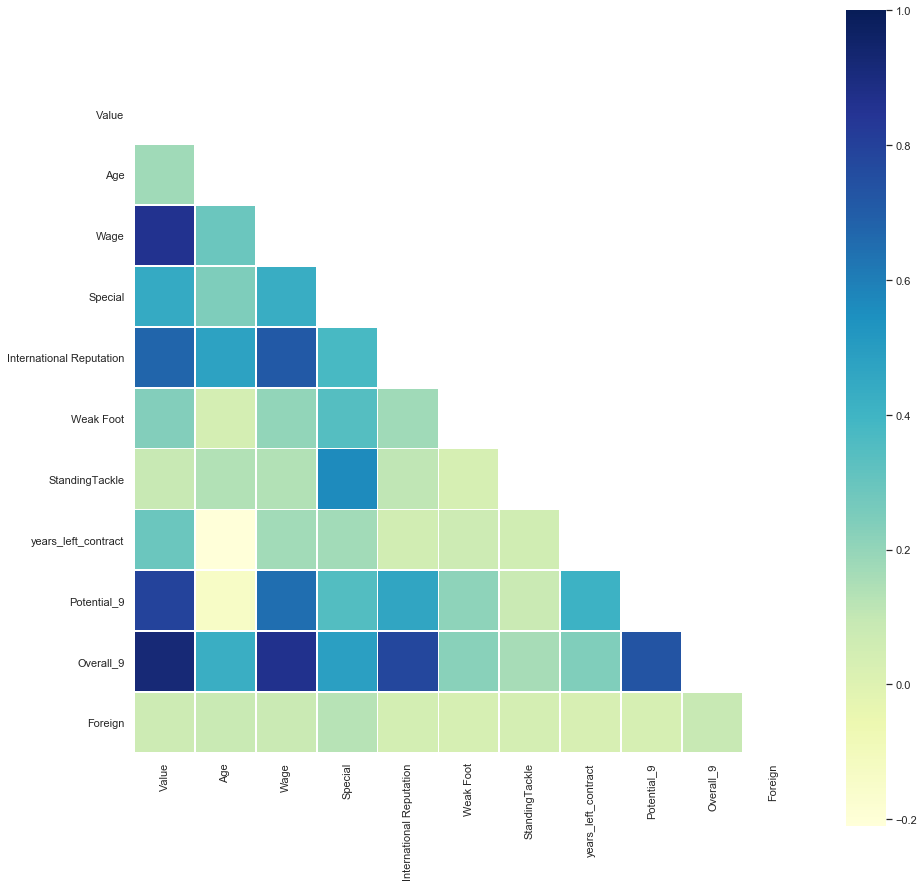

In [331]:
Corr = df_t.corr()
mask = np.zeros_like(Corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(Corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

# Creating Dummy Variables and Transforming Features with non linear relationships

Transforming some variables and adding columns

After observing the various relationships of the features and the Target varibale which was the price, I  picked two of the realtionships: overall and Potential Which were non linear, I then was then able to transform them to capture a linear relationship with my target Value(by rasing them to the power 9). I aslo was able to see from my intial base model that they had a high significance (cooeffient ) to my overall model, hence aided my decision to transform it.

In [332]:
#transformed the overall column to capture a linear relationship by raising overall to the power of 
df['Overall_9']= (df['Overall']).apply(lambda x:np.power(x,9))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


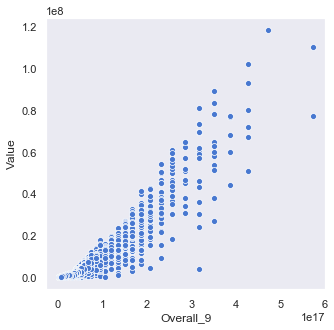

In [333]:
fig4, ax = plt.subplots(figsize=(5,5)) 
    
sns.scatterplot(data=df, y=df['Value'], x=df['Overall_9'])

In [334]:
df.Value.max()


118500000.0

In [335]:
#transformed the overall column to capture a linear relationship by raising overall to the power of 9
df['Potential_9']= (df['Potential']).apply(lambda x:np.power(x,9))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


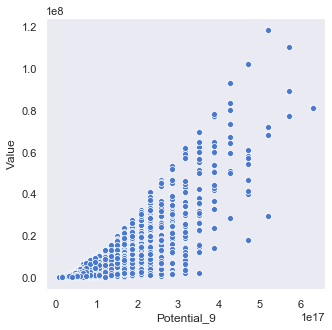

In [336]:
fig4, ax = plt.subplots(figsize=(5,5)) 
    
sns.scatterplot(data=df, y=df['Value'], x=df['Potential_9'])

In [337]:
# #selceting only the colums needed for model which includes some cateical variables (but includes value)
# features1=['Value','Club', 'Playing_in_League', 'Age', 'Nationality',
#        'Overall', 'Potential', 'Wage', 'Special',
#        'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
#        'Height',
#        'Weight', 'Crossing', 'Finishing',
#        'HeadingAccuracy','ShortPassing', 'Volleys', 'Dribbling', 'Curve',
#        'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
#        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
#        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
#        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
#        'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
#        'GKKicking', 'GKPositioning', 'GKReflexes', 'years_left_contract',
#        'Continent', 'position']

In [338]:
#selceting only the colums needed for model which includes some cateical variables (but includes value)
#decided to drop some of the player attributes because of Correlation
#dropped potential and overall because i added an Engineered column 
features_n= ['Value', 'Playing_in_League', 'Age', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Work Rate', 
       'StandingTackle', 'years_left_contract',
       'position', 'Potential_9', 'Overall_9', 'Foreign']

In [339]:
df_t= df[features_n]

In [375]:
#getting dummys for 'position','Continent','Nationality','Work Rate','Playing_in_League','Club','Preferred Foot"
df_dummy = pd.get_dummies(df_t, columns=['position','Work Rate','Playing_in_League'])

In [376]:

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891 entries, 0 to 8391
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Value                                         2891 non-null   float64
 1   Age                                           2891 non-null   int64  
 2   Wage                                          2891 non-null   float64
 3   Special                                       2891 non-null   int64  
 4   International Reputation                      2891 non-null   float64
 5   Weak Foot                                     2891 non-null   float64
 6   StandingTackle                                2891 non-null   float64
 7   years_left_contract                           2891 non-null   int64  
 8   Potential_9                                   2891 non-null   int64  
 9   Overall_9                                     2891 non-null   i

In [377]:
#DATAFRAME with Categorical varriables transformed to dummy
df4=df_dummy

In [378]:
df4.columns

Index(['Value', 'Age', 'Wage', 'Special', 'International Reputation',
       'Weak Foot', 'StandingTackle', 'years_left_contract', 'Potential_9',
       'Overall_9', 'Foreign', 'position_Attack', 'position_Defence',
       'position_Goalkeeper', 'position_Midfield', 'Work Rate_High/ High',
       'Work Rate_High/ Low', 'Work Rate_High/ Medium', 'Work Rate_Low/ High',
       'Work Rate_Low/ Low', 'Work Rate_Low/ Medium', 'Work Rate_Medium/ High',
       'Work Rate_Medium/ Low', 'Work Rate_Medium/ Medium',
       'Playing_in_League_English Premier League (1)',
       'Playing_in_League_French Ligue 1 (1)',
       'Playing_in_League_German 1. Bundesliga (1)',
       'Playing_in_League_Italian Serie A (1)',
       'Playing_in_League_Spain Primera Division (1)'],
      dtype='object')

# Train Test Split

In [345]:
df4.head()

,Value,Age,Wage,Special,International Reputation,Weak Foot,StandingTackle,years_left_contract,Potential_9,Overall_9,Foreign,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1)
0,67000000.0,32,420000.0,2280,4.0,4.0,76.0,2,427929800129788411,427929800129788411,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,51000000.0,32,380000.0,2201,4.0,3.0,92.0,2,427929800129788411,427929800129788411,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,76500000.0,28,355000.0,2190,4.0,5.0,79.0,4,387420489000000000,387420489000000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,53500000.0,26,240000.0,1311,4.0,2.0,18.0,6,387420489000000000,350356403707485209,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,59500000.0,26,285000.0,2170,3.0,3.0,90.0,3,387420489000000000,316478381828866048,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [346]:
#asign traget column to a variable
target =df4['Value']

Throughout the process of modelling I would add features that proved to be insignificant from my obsevation of the ols model in the next line of code

In [347]:
#drop Target Varibale and aslo one of each of the dummys created
#also drop unecessary features
df4 =df4.drop(columns=['Value',"Work Rate_High/ Medium", 'Work Rate_Medium/ Low',"Playing_in_League_Italian Serie A (1)","Playing_in_League_Spain Primera Division (1)","Playing_in_League_German 1. Bundesliga (1)","Work Rate_High/ High","position_Midfield","Work Rate_Low/ Medium"], inplace= False)

In [348]:
X_train, X_test, y_train, y_test = train_test_split(df4, target, random_state=22,test_size=0.2)

In [349]:
X_train.head()

,Age,Wage,Special,International Reputation,Weak Foot,StandingTackle,years_left_contract,Potential_9,Overall_9,Foreign,position_Attack,position_Defence,position_Goalkeeper,Work Rate_High/ Low,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Medium/ High,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1)
4888,25,10000.0,1858,1.0,4.0,31.0,1,95151694449171437,58871586708267913,1,1,0,0,0,0,0,0,0,0,0
4521,30,21000.0,2073,1.0,4.0,65.0,2,95151694449171437,95151694449171437,1,0,0,0,0,0,0,0,1,0,0
526,24,54000.0,2107,2.0,4.0,55.0,4,208215748530929664,150094635296999121,0,0,0,0,0,0,0,0,0,0,0
1714,21,19000.0,1892,1.0,3.0,59.0,4,231616946283203125,75084686279296875,0,0,0,0,0,0,0,0,1,0,0
75,27,130000.0,2175,3.0,3.0,75.0,3,167619550409708032,167619550409708032,0,0,0,0,0,0,0,0,0,1,0


# Scalar transformation

In [350]:
#transform to scalar

scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df4.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df4.columns)

In [351]:
X_train.head()

,Age,Wage,Special,International Reputation,Weak Foot,StandingTackle,years_left_contract,Potential_9,Overall_9,Foreign,position_Attack,position_Defence,position_Goalkeeper,Work Rate_High/ Low,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Medium/ High,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1)
0,0.046751,-0.538014,0.449728,-0.633834,1.358352,-0.874468,-1.211252,-0.390299,-0.289950,1.863318,2.261947,-0.686103,-0.361334,-0.175392,-0.139285,-0.020802,-0.343494,-0.971008,-0.527308,-0.504457
1,1.142979,-0.296738,1.165555,-0.633834,1.358352,0.522491,-0.465271,-0.390299,0.271110,1.863318,-0.442097,-0.686103,-0.361334,-0.175392,-0.139285,-0.020802,-0.343494,1.029857,-0.527308,-0.504457
2,-0.172495,0.427091,1.278755,0.760480,1.358352,0.111621,1.026693,1.001771,1.120784,-0.536677,-0.442097,-0.686103,-0.361334,-0.175392,-0.139285,-0.020802,-0.343494,-0.971008,-0.527308,-0.504457
3,-0.830232,-0.340606,0.562928,-0.633834,-0.069152,0.275969,1.026693,1.289892,-0.039220,-0.536677,-0.442097,-0.686103,-0.361334,-0.175392,-0.139285,-0.020802,-0.343494,1.029857,-0.527308,-0.504457
4,0.485242,2.094090,1.505156,2.154795,-0.069152,0.933362,0.280711,0.501941,1.391801,-0.536677,-0.442097,-0.686103,-0.361334,-0.175392,-0.139285,-0.020802,-0.343494,-0.971008,1.896423,-0.504457


# MODELLING

In [352]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X= sm.add_constant(X_train)
Y= y_train.values.reshape(-1,1)##if your frame is not lining up use
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1429.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:46:53   Log-Likelihood:                -37859.
No. Observations:                2312   AIC:                         7.576e+04
Df Residuals:                    2291   BIC:                         7.588e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         8.216e+06   6.54e+04    125.696      0.000    8.09e+06    8.34e+06
Age                                          -2.292e+06    1.2e+05    -19.142      0.000   -2.53e+06   -2.06e+06
Wage                                          2.564e+06   1.46e+05     17.559      0.000    2.28e+06    2.85e+06
Special                                      -7.366e+05   1.74e+05     -4.231      0.000   -1.08e+06   -3.95e+05
International Reputation                      -5.88e+05   1.12e+05     -5.262      0.000   -8.07e+05   -3.69e+05
Weak Foot                                     6.912e+04   7.27e+04      0.950      0.342   -7.35e+04    2.12e+05
StandingTackle                               -6.005e+05   1.42e+05     -4.235      0.000   -8.79e+05   -3.22e+05
years_left_contract                           1.912e+04   7.47e+04      0.256      0.798   -1.27e+05    1.66e+05
Potential_9                                   3.492e+05   1.46e+05      2.388      0.017    6.25e+04    6.36e+05
Overall_9                                     9.936e+06   2.34e+05     42.519      0.000    9.48e+06    1.04e+07
Foreign                                       -5.91e+04   6.71e+04     -0.881      0.379   -1.91e+05    7.25e+04
position_Attack                              -2.465e+05    8.6e+04     -2.867      0.004   -4.15e+05   -7.79e+04
position_Defence                              -4.41e+05   9.86e+04     -4.474      0.000   -6.34e+05   -2.48e+05
position_Goalkeeper                          -1.134e+06   1.46e+05     -7.759      0.000   -1.42e+06   -8.48e+05
Work Rate_High/ Low                          -1.432e+05   6.78e+04     -2.110      0.035   -2.76e+05   -1.01e+04
Work Rate_Low/ High                          -1.187e+05   6.86e+04     -1.730      0.084   -2.53e+05    1.59e+04
Work Rate_Low/ Low                            5.611e+04   6.57e+04      0.855      0.393   -7.26e+04    1.85e+05
Work Rate_Medium/ High                       -1.946e+05   7.77e+04     -2.505      0.012   -3.47e+05   -4.23e+04
Work Rate_Medium/ Medium                     -1.981e+05   8.34e+04     -2.376      0.018   -3.62e+05   -3.46e+04
Playing_in_League_English Premier League (1) -2.769e+05   7.27e+04     -3.808      0.000    -4.2e+05   -1.34e+05
Playing_in_League_French Ligue 1 (1)          1.371e+05   6.92e+04      1.982      0.048    1481.838    2.73e+05
==============================================================================
Omnibus:                      998.816   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76034.991
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                      30.999   Cond. No.      

In [353]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 3128790.3913537897


In [354]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.9257757190950876

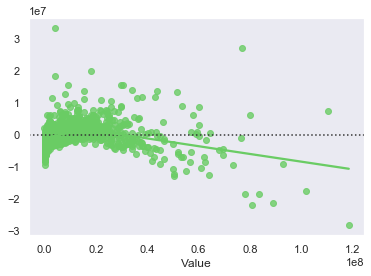

In [355]:
sns.residplot(y_train, y_train_pred,lowess=True, color="g")

# Testing

In [356]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 3235773.2712064497
Training:  3128790 vs. Testing:  3235773


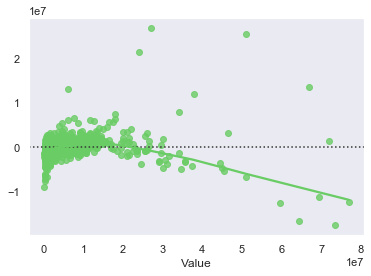

In [357]:
sns.residplot(y_test, y_pred,lowess=True, color="g")

# LASSO 

In [265]:
#LASSO
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y2_train_pred = lasso.predict(X_train)
y2_pred = lasso.predict(X_test)

trainLASS_rmse = metrics.mean_absolute_error(y_train, y2_train_pred)
testLASS_rmse = np.sqrt(metrics.mean_squared_error(y_test, y2_pred))
print('Training Error: '+ str(trainLASS_rmse) )
print('Testing Error: '+ str(testLASS_rmse) )
print('RSquared of Training:'+ str(r2_score(y_train, y2_train_pred)))
print('RSquared of test:'+ str(r2_score(y_test, y2_pred)))

Training Error: 1809984.6246564148
Testing Error: 3235773.2674191203
RSquared of Training:0.9257757190950876
RSquared of test:0.9100715279004261


In [285]:
test_ = y_test.std()
print('Root Mean Squared Error Z:' , testLASS_rmse/test_)


Root Mean Squared Error Z: 0.32682441540243895


In [266]:
r2_score(y_train, y2_train_pred)

0.9257757190950876

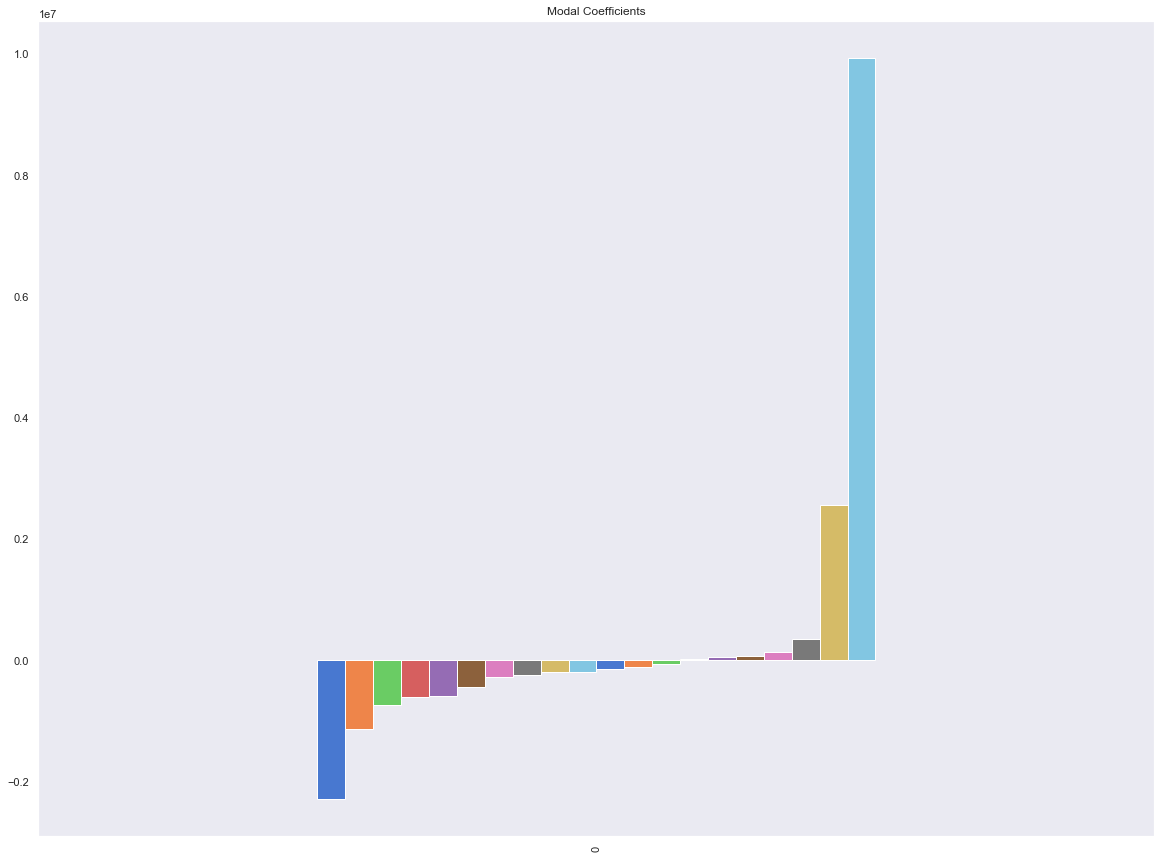

In [267]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(20,15))

# Different strokes for Different folks


I decided to make different models for outfield plays and Goalkeepers

# Model for Out-Field Players

In [268]:
df_dummy.head()


,Value,Age,Wage,Special,International Reputation,Weak Foot,StandingTackle,years_left_contract,Potential_9,Overall_9,Foreign,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1)
0,67000000.0,32,420000.0,2280,4.0,4.0,76.0,2,427929800129788411,427929800129788411,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,51000000.0,32,380000.0,2201,4.0,3.0,92.0,2,427929800129788411,427929800129788411,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,76500000.0,28,355000.0,2190,4.0,5.0,79.0,4,387420489000000000,387420489000000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,53500000.0,26,240000.0,1311,4.0,2.0,18.0,6,387420489000000000,350356403707485209,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,59500000.0,26,285000.0,2170,3.0,3.0,90.0,3,387420489000000000,316478381828866048,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [269]:
#first getting a data set with just outfield Players
df_OF= df_dummy[df_dummy['position_Goalkeeper']==0]

In [272]:
df_OF.head()

,Value,Age,Wage,Special,International Reputation,Weak Foot,StandingTackle,years_left_contract,Potential_9,Overall_9,Foreign,position_Attack,position_Defence,position_Goalkeeper,position_Midfield,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_German 1. Bundesliga (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1)
0,67000000.0,32,420000.0,2280,4.0,4.0,76.0,2,427929800129788411,427929800129788411,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,51000000.0,32,380000.0,2201,4.0,3.0,92.0,2,427929800129788411,427929800129788411,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,76500000.0,28,355000.0,2190,4.0,5.0,79.0,4,387420489000000000,387420489000000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,59500000.0,26,285000.0,2170,3.0,3.0,90.0,3,387420489000000000,316478381828866048,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,73500000.0,26,315000.0,2137,3.0,3.0,64.0,4,427929800129788411,316478381828866048,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [273]:
#get target column
target_of= df_OF['Value']

In [274]:
#drop target column and one each of the dummy varriables created(n-1)
df_OF= df_OF.drop(columns=['Value',"Playing_in_League_German 1. Bundesliga (1)","position_Midfield","Work Rate_Low/ Medium" ], inplace=False)

# Split and Scale

In [275]:
Xof_train, Xof_test, yof_train, yof_test = train_test_split(df_OF, target_of, random_state=22,test_size=0.2)

In [276]:
#transform to scalar

scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(Xof_train)

#transform the training data
Xof_train = pd.DataFrame(data=scaler.transform(Xof_train), columns=df_OF.columns)

#transform the testing dat
Xof_test = pd.DataFrame(data=scaler.transform(Xof_test), columns=df_OF.columns)

In [277]:
Xof_train.head()

,Age,Wage,Special,International Reputation,Weak Foot,StandingTackle,years_left_contract,Potential_9,Overall_9,Foreign,position_Attack,position_Defence,position_Goalkeeper,Work Rate_High/ High,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium,Playing_in_League_English Premier League (1),Playing_in_League_French Ligue 1 (1),Playing_in_League_Italian Serie A (1),Playing_in_League_Spain Primera Division (1)
0,0.085848,0.105252,1.027613,0.767320,-0.177181,-0.508822,-0.491151,0.759277,1.161252,-0.543729,2.138544,-0.777722,0.0,-0.312055,-0.186583,-0.564775,-0.153144,-0.022086,-0.377648,-0.19347,1.155851,-0.548995,-0.485327,-0.487626,-0.499086
1,-0.360477,-0.482423,-0.589193,-0.626633,-0.177181,-1.028234,-0.491151,-0.767918,-0.656727,1.839152,-0.467608,-0.777722,0.0,-0.312055,-0.186583,1.770616,-0.153144,-0.022086,-0.377648,-0.19347,-0.865164,-0.548995,-0.485327,-0.487626,-0.499086
2,0.085848,0.039955,0.233392,-0.626633,1.343312,-0.839357,0.249004,-0.256376,-0.163734,-0.543729,-0.467608,-0.777722,0.0,-0.312055,-0.186583,1.770616,-0.153144,-0.022086,-0.377648,-0.19347,-0.865164,1.821509,-0.485327,-0.487626,-0.499086
3,1.424824,-0.525955,-0.976848,0.767320,-0.177181,0.718880,-1.231306,-0.865192,-0.285345,-0.543729,-0.467608,1.285807,0.0,-0.312055,-0.186583,-0.564775,-0.153144,-0.022086,-0.377648,-0.19347,1.155851,-0.548995,-0.485327,2.050752,-0.499086
4,-0.806802,-0.199468,0.261757,-0.626633,1.343312,-1.169892,-1.231306,0.759277,0.289978,1.839152,2.138544,-0.777722,0.0,-0.312055,-0.186583,-0.564775,-0.153144,-0.022086,-0.377648,-0.19347,1.155851,-0.548995,-0.485327,-0.487626,2.003664


In [278]:
#fit the outfield data into an ols model
X= sm.add_constant(Xof_train)
Y= yof_train.values.reshape(-1,1)
lr_model_OF=sm.OLS(Y,X).fit()
lr_model_OF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1196.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:03:27   Log-Likelihood:                -33415.
No. Observations:                2051   AIC:                         6.688e+04
Df Residuals:                    2026   BIC:                         6.702e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                          8.26e+06    6.4e+04    129.150      0.000    8.13e+06    8.39e+06
Age                                          -2.354e+06   1.21e+05    -19.486      0.000   -2.59e+06   -2.12e+06
Wage                                          1.703e+06   1.48e+05     11.502      0.000    1.41e+06    1.99e+06
Special                                      -4.758e+05   1.21e+05     -3.929      0.000   -7.13e+05   -2.38e+05
International Reputation                     -5.747e+05   1.11e+05     -5.163      0.000   -7.93e+05   -3.56e+05
Weak Foot                                     9963.5621   6.87e+04      0.145      0.885   -1.25e+05    1.45e+05
StandingTackle                               -6.331e+05    1.2e+05     -5.263      0.000   -8.69e+05   -3.97e+05
years_left_contract                          -5.117e+04   7.46e+04     -0.686      0.493   -1.97e+05    9.51e+04
Potential_9                                    1.23e+05   1.41e+05      0.871      0.384   -1.54e+05       4e+05
Overall_9                                     1.079e+07   2.31e+05     46.717      0.000    1.03e+07    1.12e+07
Foreign                                      -1.172e+05   6.52e+04     -1.796      0.073   -2.45e+05    1.08e+04
position_Attack                               -2.35e+05   8.35e+04     -2.814      0.005   -3.99e+05   -7.12e+04
position_Defence                             -3.953e+05   9.67e+04     -4.086      0.000   -5.85e+05   -2.06e+05
position_Goalkeeper                           6.807e-10   4.48e-11     15.185      0.000    5.93e-10    7.69e-10
Work Rate_High/ High                          7884.1771   1.42e+05      0.055      0.956   -2.71e+05    2.87e+05
Work Rate_High/ Low                          -2.305e+05   1.04e+05     -2.222      0.026   -4.34e+05   -2.71e+04
Work Rate_High/ Medium                       -1.604e+05      2e+05     -0.801      0.423   -5.53e+05    2.32e+05
Work Rate_Low/ High                          -1.651e+05   8.96e+04     -1.842      0.066   -3.41e+05    1.07e+04
Work Rate_Low/ Low                            6.326e+04   6.49e+04      0.974      0.330   -6.41e+04    1.91e+05
Work Rate_Medium/ High                        -2.98e+05   1.54e+05     -1.935      0.053      -6e+05    3973.006
Work Rate_Medium/ Low                        -1.147e+05   1.06e+05     -1.080      0.280   -3.23e+05    9.35e+04
Work Rate_Medium/ Medium                     -2.575e+05   2.21e+05     -1.168      0.243    -6.9e+05    1.75e+05
Playing_in_League_English Premier League (1)  -9.29e+04   9.05e+04     -1.026      0.305    -2.7e+05    8.46e+04
Playing_in_League_French Ligue 1 (1)          1.846e+05   8.35e+04      2.211      0.027    2.08e+04    3.48e+05
Playing_in_League_Italian Serie 

In [279]:
#get the Rsquared from the OLS model outfield
from statsmodels.tools.eval_measures import rmse  #un-scaled target rmse
# fit your model which you have already done
# now generate predictions
ypred_OF = lr_model_OF.predict(X)# Used X instead of Xof_train becuase I used X to fit the model in code above
# calc rmse
rmse2_OF = rmse(yof_train, ypred_OF)
rmse2_OF

2878789.0803924054

# Odinary Method Outfield

In [280]:
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(Xof_train, yof_train)

yof_train_pred = lm.predict(Xof_train)

train_rmse = np.sqrt(metrics.mean_squared_error(yof_train, yof_train_pred))
Rscore =lm.score(Xof_train,yof_train)

print ('The Rscore :', Rscore)
print('Training Root Mean Squared Error:' , train_rmse)


The Rscore : 0.9340767194982771
Training Root Mean Squared Error: 2878789.080392405


# Testing Outfield

In [281]:
#use fitted model to predict on the test examples
yof_pred = lm.predict(Xof_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(yof_test, yof_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 3529549.935326819
Training:  2878789 vs. Testing:  3529549


# LASSO Outfield

In [283]:
#LASSO
from sklearn.linear_model import Lasso

lasso2 = Lasso(alpha=0.01, normalize=False)

lasso2.fit(Xof_train,yof_train)

y2of_train_pred = lasso2.predict(Xof_train)
y2of_pred = lasso2.predict(Xof_test)

trainLASS_rmse = metrics.mean_absolute_error(yof_train, y2of_train_pred)
testLASS_rmse = np.sqrt(metrics.mean_squared_error(yof_test, y2of_pred))
print('Training Error: '+ str(trainLASS_rmse) )
print('Testing Error: '+ str(testLASS_rmse) )
print('RSquared of Training:'+ str(r2_score(yof_train, y2of_train_pred)))
print('RSquared of test:'+ str(r2_score(yof_test, y2of_pred)))

Training Error: 1681619.3508845514
Testing Error: 3529549.9390217084
RSquared of Training:0.9340767194982769
RSquared of test:0.9210609559541996


In [284]:
# standardized the RMSE to have a real sense of what the error meant relative to my data 
test_std = yof_test.std()
print('Root Mean Squared Error Z:' , test_rmse/test_std)


Root Mean Squared Error Z: 0.28068695481266515


# For Just Goalkeepers

In [394]:
#selecting a data frame of just goal keepers
df_G= df_dummy[df_dummy['position_Goalkeeper']==1]

In [395]:
#get target column
target_G= df_G['Value']

for the Goalkeepers I got to drop some more features that had High p values and this in turn improved my model

In [396]:
#drop target column and one each of the dummy varriables created(n-1) a
df_G= df_G.drop(columns=['Value',"Playing_in_League_German 1. Bundesliga (1)","position_Midfield","Work Rate_Low/ Medium" ], inplace=False)

# Split and scale the goalkeepers

In [397]:
#split the goal keeper data
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(df_G, target_G, random_state=22,test_size=0.2)

In [398]:
#transform to scalar

scaler_g = StandardScaler()
# fit the scaler to the training data
scaler_g.fit(X_train_g)

#transform the training data
X_train_g= pd.DataFrame(data=scaler.transform(X_train_g), columns=df_G.columns)

#transform the testing dat
X_test_g = pd.DataFrame(data=scaler.transform(X_test_g), columns=df_G.columns)

In [399]:
#an ols modelof the Goal keepers
X_g= sm.add_constant(X_train_g)
Y_g= y_train_g.values.reshape(-1,1)
lr_model_g=sm.OLS(Y_g,X_g).fit()
lr_model_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     231.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          8.90e-133
Time:                        01:02:16   Log-Likelihood:                -4217.5
No. Observations:                 261   AIC:                             8465.
Df Residuals:                     246   BIC:                             8519.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Age                                          -1.098e+06   2.46e+05     -4.459      0.000   -1.58e+06   -6.13e+05
Wage                                          5.246e+06   4.49e+05     11.673      0.000    4.36e+06    6.13e+06
Special                                       -1.03e+06   4.53e+05     -2.272      0.024   -1.92e+06   -1.37e+05
International Reputation                     -1.799e+06   2.79e+05     -6.440      0.000   -2.35e+06   -1.25e+06
Weak Foot                                     8.622e+04   1.65e+05      0.522      0.602   -2.39e+05    4.12e+05
StandingTackle                                1.474e+06    1.2e+06      1.229      0.220   -8.89e+05    3.84e+06
years_left_contract                           4.019e+05   1.95e+05      2.060      0.040    1.76e+04    7.86e+05
Potential_9                                   9.583e+05   3.79e+05      2.532      0.012    2.13e+05     1.7e+06
Overall_9                                     5.518e+06   5.67e+05      9.731      0.000     4.4e+06    6.64e+06
Foreign                                      -1.141e+04   2.07e+05     -0.055      0.956    -4.2e+05    3.97e+05
position_Attack                              -9.116e+05   2.83e+05     -3.216      0.001   -1.47e+06   -3.53e+05
position_Defence                             -1.516e+06   4.71e+05     -3.216      0.001   -2.44e+06   -5.88e+05
position_Goalkeeper                           1.949e+06   6.06e+05      3.216      0.001    7.56e+05    3.14e+06
Work Rate_High/ High                         -6.083e+05   1.89e+05     -3.216      0.001   -9.81e+05   -2.36e+05
Work Rate_High/ Low                          -3.637e+05   1.13e+05     -3.216      0.001   -5.86e+05   -1.41e+05
Work Rate_High/ Medium                       -1.101e+06   3.42e+05     -3.216      0.001   -1.78e+06   -4.27e+05
Work Rate_Low/ High                          -2.985e+05   9.28e+04     -3.216      0.001   -4.81e+05   -1.16e+05
Work Rate_Low/ Low                           -4.305e+04   1.34e+04     -3.216      0.001   -6.94e+04   -1.67e+04
Work Rate_Medium/ High                       -7.362e+05   2.29e+05     -3.216      0.001   -1.19e+06   -2.85e+05
Work Rate_Medium/ Low                        -3.771e+05   1.17e+05     -3.216      0.001   -6.08e+05   -1.46e+05
Work Rate_Medium/ Medium                      2.253e+06   7.01e+05      3.216      0.001    8.73e+05    3.63e+06
Playing_in_League_English Premier League (1) -2.719e+05   2.38e+05     -1.145      0.253    -7.4e+05    1.96e+05
Playing_in_League_French Ligue 1 (1)         -1.966e+05   2.08e+05     -0.944      0.346   -6.07e+05    2.13e+05
Playing_in_League_Italian Serie A (1)        -1.544e+05    2.2e+05     -0.703      0.483   -5.87e+05    2.78e+05
Playing_in_League_Spain Primera 

In [400]:
#get the Rsquared from the OLS model
from statsmodels.tools.eval_measures import rmse  
# fit your model which you have already done
# now generate predictions
ypred_g = lr_model_g.predict(X_g)#used X_g because that was the way the ols model was fit
# calc rmse
rmse2_g = rmse(y_train_g, ypred_g)
print(rmse2_g)

2521189.989710113


# Lasso Goalkeepers

In [401]:
#LASSO for goalies 
from sklearn.linear_model import Lasso

lasso_g= Lasso(alpha=0.01, normalize=False)

lasso_g.fit(X_train_g,y_train_g)

y_train_pred_g = lasso_g.predict(X_train_g)
y_pred_g = lasso_g.predict(X_test_g)

trainLASS_rmse_g = metrics.mean_absolute_error(y_train_g, y_train_pred_g)
testLASS_rmse_g = np.sqrt(metrics.mean_squared_error(y_test_g, y_pred_g))
print('Training Error: '+ str(trainLASS_rmse_g ) )
print('Testing Error: '+ str(testLASS_rmse_g) )
print('RSquared of train:'+ str(r2_score(y_train_g, y_train_pred_g)))
print('RSquared of test:'+ str(r2_score(y_test_g, y_pred_g)))

Training Error: 1606038.4199338243
Testing Error: 4187124.454600688
RSquared of train:0.9294255535932786
RSquared of test:0.8477251100800077


In [402]:
# standardized the RMSE to have a real sense of what the error means relative to my data 
test_std_g = y_test_g.std()
print('Root Mean Squared Error Z:' , testLASS_rmse_g /test_std_g)


Root Mean Squared Error Z: 0.38725662630634766


# In conclusion

I started with a model for all the players in my best model after transforming the features and dropping several features along the way, using the ols summary to guide me along the was. I looked at P values of the different featues were to determine if there was a high probability the coefficents were as a result of chance, and if that was the cas i dropped the features. 
MODEL 1 Lasso
Training Error: 1809984.6246564148
Testing Error: 3235773.2674191203
RSquared of Training:0.9257757190950876
RSquared of test:0.9100715279004261


MODEL 2 lasso outfield players only:
Training Error: 1681619.3508845514
Testing Error: 3529549.9390217084
RSquared of Training:0.9340767194982769
RSquared of test:0.9210609559541996

MODEL 2 lasso just Goal Keepers
Training Error: 1606038.4199338243
Testing Error: 4187124.454600688
RSquared of train:0.9294255535932786
RSquared of test:0.8477251100800077

Breaking up my model into outfield and goalkeeper made for a lower traing RMSE, but and even more varried testing RMSE the Rsquare was increase a little. I was not able to conclude if the model is signiificanly better when broken up.

But I can say about all my models with the exception of the Goalkeeper model, I was a able to get a really high R square score at >90 and a low error at less than 0.4 of the standard deviation of my data





